# Neural Network to recognize hand-written digits 0-9 using TensorFlow Keras

### 1 - Multiclass classification Neural Network created with TensorFlow applying the following concepts:

* **ReLU (Rectified Linear Unit):** Activation function that helps the network to learn complex patterns by outputting the input directly if it is positive; otherwise, it outputs zero.

* **Softmax Layer (with Logits and Linear Activation):** In the preferred approach, the final layer of the network uses a linear activation function, producing outputs known as logits. These logits represent unnormalized prediction scores. The `from_logits=True` argument in the loss function informs it to apply the softmax operation during the loss calculation, leading to an optimized and more numerically stable implementation.

* **Adam Optimizer:** A popular optimization algorithm. It adapts the learning rate for each parameter and uses momentum to speed up convergence.

* **Regularization:** This technique is used to prevent overfitting in machine learning models by adding a penalty to the loss function. This penalty discourages the model from becoming too complex, such as having excessively large weights or relying too heavily on specific features, thereby promoting generalization to unseen data.

* **Train, Test, and Validation Data:** The dataset is usually split into these three subsets. Training data is used to train the model, validation data is used to tune hyperparameters, and test data is used to evaluate the model's performance on unseen data.

#### My implementation Steps:

**1.** Creating the Dataset

**2.** Visualizing the Data

**3.** Creating the Model

**4.** Predictions

**5.** Finding the Optimal λ Value






In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

### The Dataset

- The data set contains 5000 training examples of handwritten digits $^1$.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit.
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location.
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector.
        - Each training examples becomes a single row in the data matrix `X_train`.
        - This returns a 3000 x 400 matrix `X_train` where every row is a training example of a handwritten digit image. (`X_cv` and `X_test` are 1000 x 400 matrices)

$$X =
\left(\begin{array}{cc}
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\
--- (x^{(m)}) ---
\end{array}\right)$$

- The second part of the training set is a 5000 x 1 dimensional vector `y` that contains labels for the training set

This is a subset of the MNIST handwritten digit dataset http://yann.lecun.com/exdb/mnist/

In [ ]:
def load_data():
    X = np.load("/content/X.npy")
    y = np.load("/content/y.npy")
    return X, y

# Load data
X, y = load_data()

# Training data (60%), validation (20%) and test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=1)

print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)




X_train.shape: (3000, 400) X_cv.shape: (1000, 400) X_test.shape: (1000, 400)


### Visualizing the Data

Below there is a visualization of a subset of the training set.
- The code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together.
- The label for each image is displayed above the image

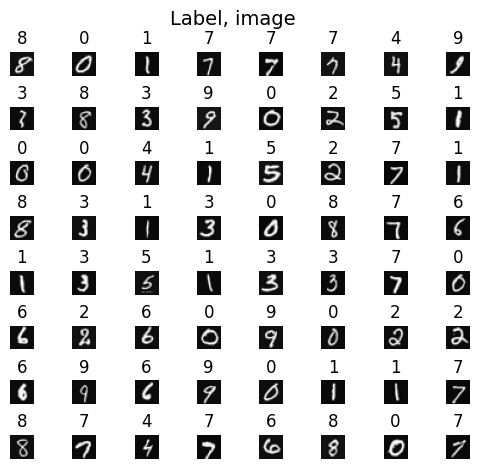

In [ ]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

### Model

**Three-layer model composed by:**
* Input layer of 400 inputs, Since the images are of size $20\times20$, this is $400$ inputs
* Dense layer with 25 units
, ***relu*** activation, `kernel_regularizer=l2(0.01)`
* Dense layer with 15 units, ***relu*** activation, `kernel_regularizer=l2(0.01)`
* Dense layer with 10 units (one for each digit) and a linear activation using the ***Softmax approach*** discussed above.

*Note that:*
 * layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
 * layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
 * layer3: The shape of `W3` is (15, 10) and the shape of `b3` is: (10,)

***Later on the notebook*** there will be a comparison between different Lambdas values in order to find the optimal regularization value (λ).

**Compiled using**
* loss with **`SparseCategoricalCrossentropy**`, and  ***from_logits=True***
* ***Adam optimizer*** with learning rate of 0.001.


In [ ]:
# Seed
tf.random.set_seed(1234)

# Model definition (l2 regularizer)
model = Sequential(
    [
        tf.keras.layers.InputLayer((400,)),
        tf.keras.layers.Dense(25, activation="relu", kernel_regularizer=l2(0.01), name="L1"),
        tf.keras.layers.Dense(15, activation="relu", kernel_regularizer=l2(0.01), name="L2"),
        tf.keras.layers.Dense(10, activation="linear", name="L3")
    ], name="my_model"
)

# Compile (SparseCategoricalCrossentropy and Adam Optimizer)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

# training
history = model.fit(
    X_train, y_train,
    epochs=40,
    validation_data=(X_cv, y_cv)
)

Epoch 1/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.6434 - val_loss: 1.6819
Epoch 2/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5153 - val_loss: 1.1513
Epoch 3/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1178 - val_loss: 0.9937
Epoch 4/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9828 - val_loss: 0.9193
Epoch 5/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9095 - val_loss: 0.8704
Epoch 6/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8582 - val_loss: 0.8326
Epoch 7/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8158 - val_loss: 0.8012
Epoch 8/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7817 - val_loss: 0.7743
Epoch 9/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7536 - val_loss: 0.7507
Epoch 10/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7298 - val_loss: 0.7319
Epoch 11/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7095 - val_loss: 0.7157
Epoch 12/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6921 - val_lo

In [ ]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 25)                  │          10,025 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L2 (Dense)                           │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L3 (Dense)                           │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,727 (123.94 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,152 (82.63 KB)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of X_cv:", X_cv.shape)

Shape of X_train: (3000, 400)
Shape of y_train: (3000, 1)
Shape of X_test: (1000, 400)
Shape of X_cv: (1000, 400)


In [ ]:
# Applies softmax to convert logits to probabilities and then uses argmax to select the class with the highest probability.
model_predict_softmaxApplied = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(), axis=1)

In [ ]:
# Calculate categorization error
def eval_cat_err(y, yhat):
    """
    Calculate the categorization error
    Args:
      y    : (ndarray Shape (m,))  target value of each example  like: [...]
      yhat : (ndarray Shape (m,))  predicted value of each example like: [...]
    Returns:
      err: (scalar)
    """
    m = len(y)
    incorrect = np.sum(yhat != y)
    err = incorrect / m
    return err


# Flatten y_train, y_cv, and y_test since they are arrays of arrays. [[],[]...]
y_train_flat = y_train.flatten()
y_cv_flat = y_cv.flatten()
y_test_flat = y_test.flatten()

# Using the function defined above to predict the values
training_cerr = eval_cat_err(y_train_flat, model_predict_softmaxApplied(X_train))
cv_cerr = eval_cat_err(y_cv_flat, model_predict_softmaxApplied(X_cv))
test_cerr = eval_cat_err(y_test_flat, model_predict_softmaxApplied(X_test))

print(f"Categorization error - Training: {training_cerr:.3f}")
print(f"Categorization error - Validation: {cv_cerr:.3f}")
print(f"Categorization error - Test: {test_cerr:.3f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Categorization error - Training: 0.053
Categorization error - Validation: 0.084
Categorization error - Test: 0.100


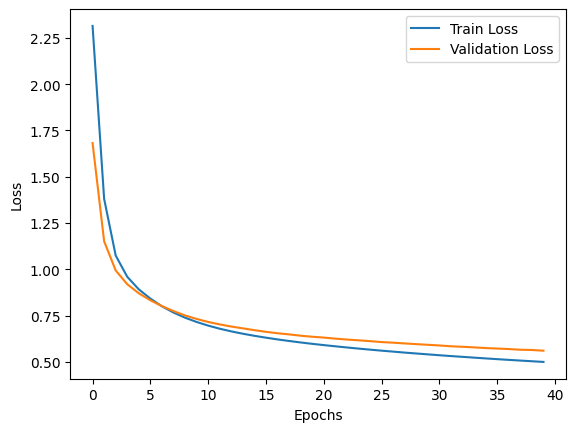

In [ ]:
# Loss visualization
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Predictions

**1) Single prediction showing difference between logits and probability vector**

**2) Using model_predict_softmaxApplied function defined above to predict a random sample of 64 digits**


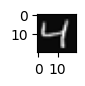

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
 prediction: [[-3.71 -4.26 -0.8  -0.64  1.98 -2.48 -1.11 -1.3  -2.08 -0.18]]
 Largest Prediction index:4
Probability vector: [[0.   0.   0.05 0.05 0.73 0.01 0.03 0.03 0.01 0.08]]
Bigger probability:4
Total sum of predictions: 1.000


In [ ]:
## Single prediction

def display_digit(X):
    """ display a single digit. The input is one digit (400,). """
    fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
    X_reshaped = X.reshape((20,20)).T
    # Display the image
    ax.imshow(X_reshaped, cmap='gray')
    plt.show()

# On X[2000] there is a 4 handwritten
image = X[2000]
display_digit(image)

# Single prediction, using model.predict

prediction = model.predict(image.reshape(1,400))

print(f" prediction: {prediction}")
print(f" Largest Prediction index:{np.argmax(prediction)}")

prediction_p = tf.nn.softmax(prediction)  #This is converting logits to probabilities

print(f"Probability vector: {prediction_p}")
print(f"Bigger probability:{np.argmax(prediction_p)}") #Using argmax to select the class with the highest probability.
print(f"Total sum of predictions: {np.sum(prediction_p):0.3f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━

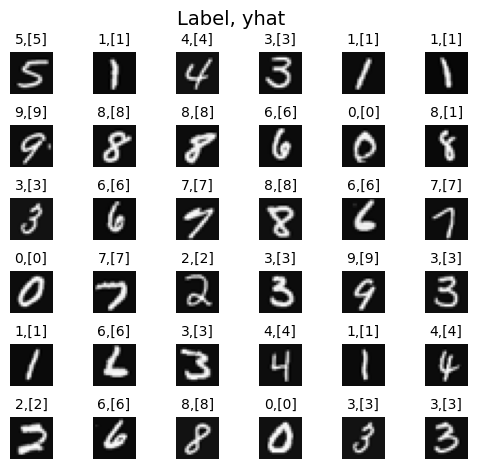

In [ ]:
## Random sample of 36 digits from the test dataset

m, n = X_test.shape

sample = 6 #sample*sample = total sample

fig, axes = plt.subplots(sample,sample, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_test_random_reshaped = X_test[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_test_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    yhat = model_predict_softmaxApplied(X_test[random_index].reshape(1,400))

    # Display the label above the image
    ax.set_title(f"{y_test[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

### Finding the optimal regularization value (λ)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Lambda = 0.001 | Training Error: 0.018 | Validation Error: 0.077 | Test Error: 0.081
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Lambda = 0.01 | Training Error: 0.060 | Validation Error: 0.094 | Test Error: 0.102
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Lambda = 0.1 | Training Error: 0.140 | Validation Error: 0.138 | Test Error: 0.154


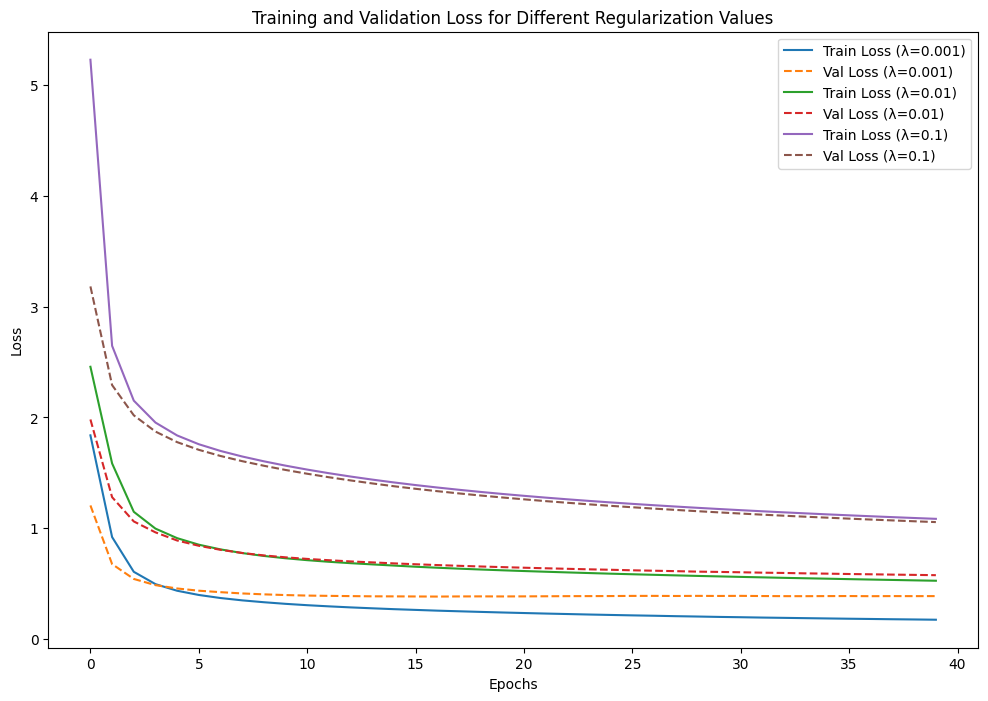

Lambda: 0.001 - Training Error: 0.018, Validation Error: 0.077, Test Error: 0.081
Lambda: 0.01 - Training Error: 0.060, Validation Error: 0.094, Test Error: 0.102
Lambda: 0.1 - Training Error: 0.140, Validation Error: 0.138, Test Error: 0.154


In [ ]:
# Regularization values to test
lambdas = [0.001, 0.01, 0.1]
models = [None] * len(lambdas)
histories = [None] * len(lambdas)  # To store the history of each model's training
errors = []

for i, lambda_ in enumerate(lambdas):
    # Model defined again but using dinamic lambda for each case
    model = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer((400,)),
            tf.keras.layers.Dense(25, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(lambda_), name="L1"),
            tf.keras.layers.Dense(15, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(lambda_), name="L2"),
            tf.keras.layers.Dense(10, activation="linear", name="L3")
        ], name=f"model_lambda_{lambda_}"
    )

    # Compile
    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    )

    # Training of the model and storing of the training history
    history = model.fit(
        X_train, y_train,
        epochs=40,
        validation_data=(X_cv, y_cv),
        verbose=0  # Suppress output for each epoch
    )
    histories[i] = history
    models[i] = model

    # Predict on training, validation, and test sets and calculate the categorization error
    training_cerr = eval_cat_err(y_train_flat, np.argmax(model.predict(X_train), axis=1))
    cv_cerr = eval_cat_err(y_cv_flat, np.argmax(model.predict(X_cv), axis=1))
    test_cerr = eval_cat_err(y_test_flat, np.argmax(model.predict(X_test), axis=1))

    # Save the errors in a list
    errors.append({
        "lambda": lambda_,
        "training_cerr": training_cerr,
        "cv_cerr": cv_cerr,
        "test_cerr": test_cerr
    })

    # Print progress and results for each lambda
    print(f"Lambda = {lambda_} | Training Error: {training_cerr:.3f} | Validation Error: {cv_cerr:.3f} | Test Error: {test_cerr:.3f}")

# Plotting the loss for each lambda value
plt.figure(figsize=(12, 8))
for i, lambda_ in enumerate(lambdas):
    plt.plot(histories[i].history['loss'], label=f'Train Loss (λ={lambda_})')
    plt.plot(histories[i].history['val_loss'], '--', label=f'Val Loss (λ={lambda_})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for Different Regularization Values')
plt.show()

# Displaying the categorization errors for each lambda value
for error in errors:
    print(f"Lambda: {error['lambda']} - Training Error: {error['training_cerr']:.3f}, Validation Error: {error['cv_cerr']:.3f}, Test Error: {error['test_cerr']:.3f}")
